In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Saving sunflower.jpg to sunflower (1).jpg
Uploaded file: sunflower (1).jpg


Saving 구절초.jpg to 구절초 (1).jpg
Uploaded file: 구절초 (1).jpg
MSE (Mean Squared Error): 105.23
SSIM (Structural Similarity Index): 0.2415
Cosine Similarity: 0.8385


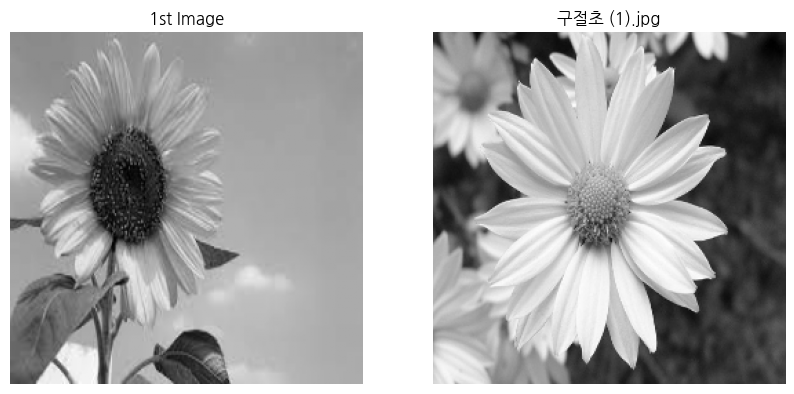

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

# MSE (평균 제곱 오차)
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# SSIM (구조적 유사도)
def calculate_ssim(image1, image2):
    score, _ = ssim(image1, image2, full=True)
    return score

# 코사인 유사도
def cosine_similarity_images(image1, image2):
    img1_flat = image1.flatten().reshape(1, -1)
    img2_flat = image2.flatten().reshape(1, -1)
    return cosine_similarity(img1_flat, img2_flat)[0][0]

# 이미지 불러오기 (그레이스케일 변환)
def load_image(image_path):
    image = cv2.imread(f'/content/{image_path}', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"이미지를 불러올 수 없습니다: {image_path}")
    return cv2.resize(image, (256, 256))  # 크기 조정

# 두 이미지 비교
def compare_images(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    mse_score = mse(img1, img2)
    ssim_score = calculate_ssim(img1, img2)
    cosine_score = cosine_similarity_images(img1, img2)

    print(f"MSE (Mean Squared Error): {mse_score:.2f}")
    print(f"SSIM (Structural Similarity Index): {ssim_score:.4f}")
    print(f"Cosine Similarity: {cosine_score:.4f}")

# 두 이미지를 함께 출력
def display_images(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(image1_path)
    axes[0].axis('off')

    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(image2_path)
    axes[1].axis('off')

    plt.show()

# 이미지 파일 경로 설정
# image1_path = 'image1.jpg'
# image2_path = 'image2.jpg'

# 첫번째 이미지 업로드
uploaded = files.upload()

# 업로드된 파일 이름 가져오기
image1_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image1_path}")

# 두번째 이미지 업로드
uploaded = files.upload()

# 업로드된 파일 이름 가져오기
image2_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image2_path}")

compare_images(image1_path, image2_path)
display_images(image1_path, image2_path)


In [ ]:
# tensorlow 설치
!pip install tensorflow --quiet

Saving sunflower.jpg to sunflower (3).jpg
Uploaded file: sunflower (3).jpg


Saving 구절초.jpg to 구절초 (3).jpg
Uploaded file: 구절초 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
MSE (Mean Squared Error): 105.23
SSIM (Structural Similarity Index): 0.2415
Cosine Similarity: 0.8385
CNN Feature Similarity (VGG16): 0.3880


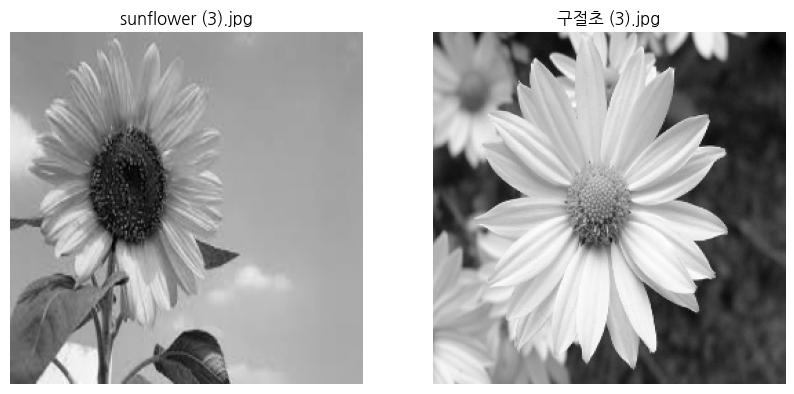

In [ ]:
# pre-Trained CNN 모델 추가

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from google.colab import files

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

# 이미지 불러오기 및 전처리 (그레이스케일)
def load_image(image_path, grayscale=True):
    if grayscale:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR이므로 RGB로 변환
    if img is None:
        raise ValueError(f"이미지를 불러올 수 없습니다: {image_path}")
    return cv2.resize(img, (256, 256))

# MSE (평균 제곱 오차)
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# SSIM (구조적 유사도)
def calculate_ssim(image1, image2):
    score, _ = ssim(image1, image2, full=True)
    return score

# 코사인 유사도
def cosine_similarity_images(image1, image2):
    img1_flat = image1.flatten().reshape(1, -1)
    img2_flat = image2.flatten().reshape(1, -1)
    return cosine_similarity(img1_flat, img2_flat)[0][0]

# Pre-trained VGG16 모델을 사용한 유사도 측정
def deep_learning_similarity(image_path1, image_path2):
    model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=model.input, outputs=model.output)

    def extract_features(img_path):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return model.predict(img_array).flatten()

    features1 = extract_features(image_path1)
    features2 = extract_features(image_path2)

    similarity = cosine_similarity([features1], [features2])[0][0]
    return similarity

# 두 이미지 비교
def compare_images(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    mse_score = mse(img1, img2)
    ssim_score = calculate_ssim(img1, img2)
    cosine_score = cosine_similarity_images(img1, img2)
    cnn_score = deep_learning_similarity(image_path1, image_path2)

    print(f"MSE (Mean Squared Error): {mse_score:.2f}")
    print(f"SSIM (Structural Similarity Index): {ssim_score:.4f}")
    print(f"Cosine Similarity: {cosine_score:.4f}")
    print(f"CNN Feature Similarity (VGG16): {cnn_score:.4f}")

# 두 이미지를 함께 출력
def display_images(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(image1_path)
    axes[0].axis('off')

    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(image2_path)
    axes[1].axis('off')

    plt.show()

# 첫 번째 이미지 업로드
uploaded = files.upload()
image1_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image1_path}")

# 두 번째 이미지 업로드
uploaded = files.upload()
image2_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image2_path}")

# 유사도 분석 및 이미지 표시
compare_images(image1_path, image2_path)
display_images(image1_path, image2_path)


Saving sunflower.jpg to sunflower (9).jpg
Uploaded file: sunflower (9).jpg


Saving 구절초.jpg to 구절초 (9).jpg
Uploaded file: 구절초 (9).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
MSE (Mean Squared Error): 105.23
SSIM (Structural Similarity Index): 0.2415
Cosine Similarity: 0.8385
CNN Feature Similarity (VGG16): 0.3880


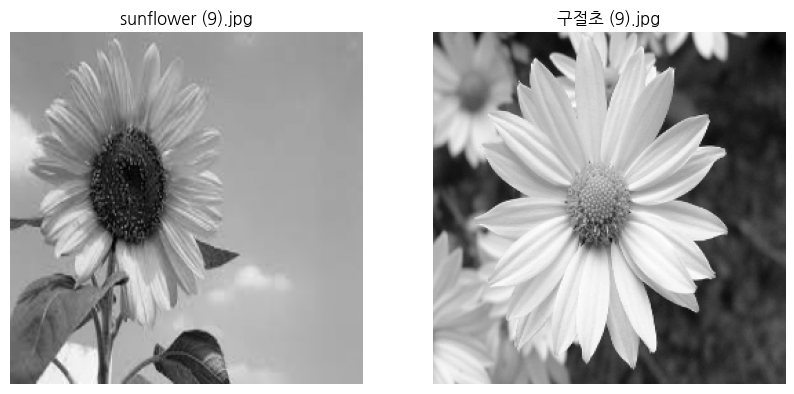

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
MSE (Mean Squared Error): 105.23
SSIM (Structural Similarity Index): 0.2415
Cosine Similarity: 0.8385
CNN Feature Similarity (VGG16): 0.3880


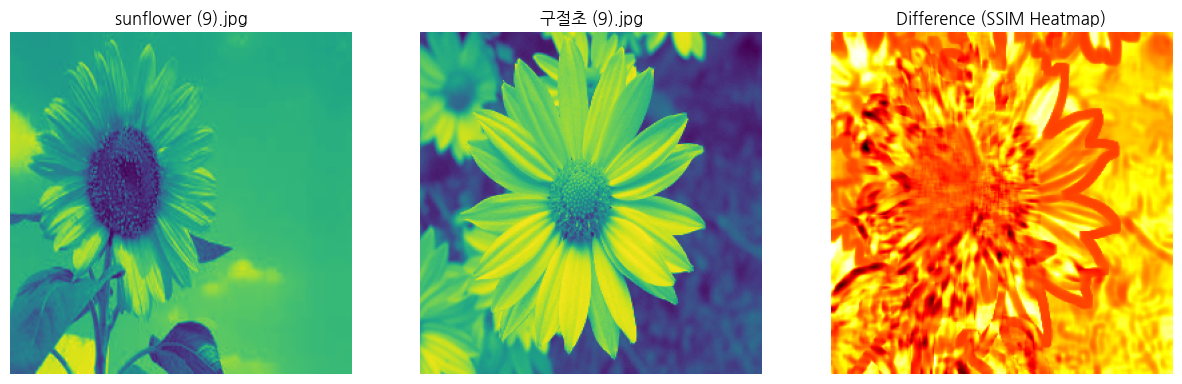

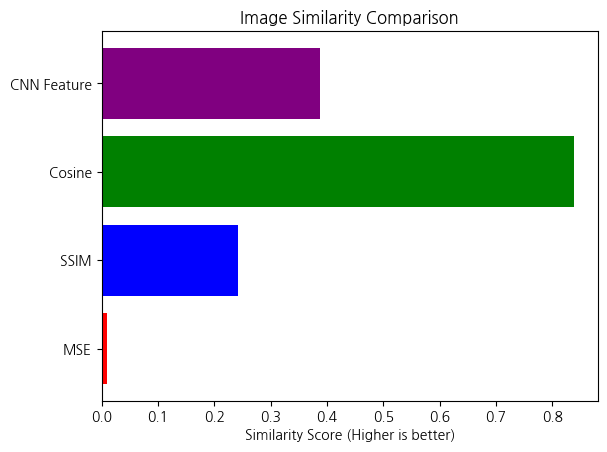

In [ ]:
# 유사도 측정 결과를 시각

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from google.colab import files

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

# 이미지 불러오기 및 전처리 (그레이스케일)
def load_image(image_path, grayscale=True):
    if grayscale:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR이므로 RGB로 변환
    if img is None:
        raise ValueError(f"이미지를 불러올 수 없습니다: {image_path}")
    return cv2.resize(img, (256, 256))

# MSE (평균 제곱 오차)
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# SSIM (구조적 유사도)
def calculate_ssim(image1, image2):
    score, diff = ssim(image1, image2, multichannel=True, full=True)
    return score, diff

# 코사인 유사도
def cosine_similarity_images(image1, image2):
    img1_flat = image1.flatten().reshape(1, -1)
    img2_flat = image2.flatten().reshape(1, -1)
    return cosine_similarity(img1_flat, img2_flat)[0][0]

# Pre-trained VGG16 모델을 사용한 유사도 측정
def deep_learning_similarity(image_path1, image_path2):
    model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=model.input, outputs=model.output)

    def extract_features(img_path):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return model.predict(img_array).flatten()

    features1 = extract_features(image_path1)
    features2 = extract_features(image_path2)

    similarity = cosine_similarity([features1], [features2])[0][0]
    return similarity

# 두 이미지 유사도 측정 후 값만 출력
def compare_images(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    mse_score = mse(img1, img2)
    ssim_score, diff = calculate_ssim(img1, img2)
    cosine_score = cosine_similarity_images(img1, img2)
    cnn_score = deep_learning_similarity(image_path1, image_path2)

    print(f"MSE (Mean Squared Error): {mse_score:.2f}")
    print(f"SSIM (Structural Similarity Index): {ssim_score:.4f}")
    print(f"Cosine Similarity: {cosine_score:.4f}")
    print(f"CNN Feature Similarity (VGG16): {cnn_score:.4f}")

# 두 이미지를 함께 출력
def display_images(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(image1_path)
    axes[0].axis('off')

    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(image2_path)
    axes[1].axis('off')

    plt.show()

# 두 이미지 유사도를 측정한 결과를 보다 명확하게 시각화

def compare_and_visualize(image_path1, image_path2):
    img1 = load_image(image_path1)
    img2 = load_image(image_path2)

    mse_score = mse(img1, img2)
    ssim_score, diff = calculate_ssim(img1, img2)
    cosine_score = cosine_similarity_images(img1, img2)
    cnn_score = deep_learning_similarity(image_path1, image_path2)

    # 유사도 점수 출력
    print(f"MSE (Mean Squared Error): {mse_score:.2f}")
    print(f"SSIM (Structural Similarity Index): {ssim_score:.4f}")
    print(f"Cosine Similarity: {cosine_score:.4f}")
    print(f"CNN Feature Similarity (VGG16): {cnn_score:.4f}")

    # 시각화: 원본 및 차이 이미지
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img1)
    axes[0].set_title(image1_path)
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title(image2_path)
    axes[1].axis('off')

    # 차이 이미지를 히트맵으로 시각화
    axes[2].imshow(diff, cmap='hot')
    axes[2].set_title("Difference (SSIM Heatmap)")
    axes[2].axis('off')

    plt.show()

    # 유사도 점수 막대 그래프 출력
    labels = ["MSE", "SSIM", "Cosine", "CNN Feature"]
    scores = [1/mse_score, ssim_score, cosine_score, cnn_score]  # MSE는 역수로 표시 (값이 낮을수록 유사)

    plt.barh(labels, scores, color=['red', 'blue', 'green', 'purple'])
    plt.xlabel("Similarity Score (Higher is better)")
    plt.title("Image Similarity Comparison")
    plt.show()

# 첫 번째 이미지 업로드
uploaded = files.upload()
image1_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image1_path}")

# 두 번째 이미지 업로드
uploaded = files.upload()
image2_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image2_path}")

# 유사도 분석 및 이미지 표시
compare_images(image1_path, image2_path)
display_images(image1_path, image2_path)
compare_and_visualize(image1_path, image2_path)